# Latent Dirichleht Allocation

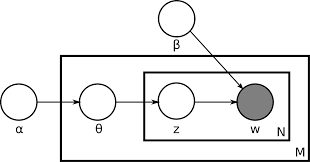

###### Installing PyMC

In [1]:
!pip install pymc

###### Importing The Libraries

In [2]:
import pymc as pm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

###### Importing The Dataset

In [3]:
# Importing csv file using panda

# Here I used two datasets to train the model, because the large dataset take too much time to run.

#data = pd.read_csv('essays3.csv')

data = pd.read_csv('Five_Hundred_Essay.csv')

###### Data Preprocessing with Python

In [4]:
# Print the number of documents

len(data)

# or 

len(data.TEXT)

500

In [5]:
# This function returns the first n rows for the object based on position.
# It is useful for quickly testing if your object has the right type of data in it.

data.head()

,#AUTHID,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
0,1997_504851.txt,"Well, right now I just woke up from a mid-day ...",n,y,y,n,y
1,1997_605191.txt,"Well, here we go with the stream of consciousn...",n,n,y,n,n
2,1997_687252.txt,An open keyboard and buttons to push. The thin...,n,y,n,y,y
3,1997_568848.txt,I can't believe it! It's really happening! M...,y,n,y,y,n
4,1997_688160.txt,"Well, here I go with the good old stream of co...",y,n,y,n,y


###### Convert a collection of text documents to a matrix of token counts.

In [6]:
# removing stop words
# max_df ignore terms that have a document frequency strictly higher than the given threshold
# min_df ignore terms that have a document frequency strictly lower than the given threshold

vectorizer = CountVectorizer(stop_words='english',max_df=1.0, min_df=0.1)
X = vectorizer.fit_transform(data.TEXT)

In [7]:
# Return a tuple representing the dimensionality of the DataFrame.
# The first number is the number or rows and the second one is the number of words which will be used in ML model

X.shape

(500, 315)

In [8]:
# Print the number of words regardless of how often each of them is repeated 

len(vectorizer.vocabulary_)

315

In [9]:
# Print the number of times a specific word is repeated
# Here I tried the word "think"

vectorizer.vocabulary_.get(u'think')

259

In [10]:
# Print each word with its count in the whole file after deleting stop words and applying min df and max df

vectorizer.vocabulary_

{'right': 211,
 'just': 133,
 'day': 45,
 'sort': 233,
 'weird': 294,
 'texas': 256,
 'problems': 201,
 'things': 258,
 'remember': 209,
 'starting': 238,
 'homework': 117,
 'grade': 97,
 'soon': 232,
 'course': 41,
 'did': 48,
 'got': 96,
 'little': 148,
 'lot': 158,
 'work': 300,
 'spend': 235,
 'hours': 122,
 'doing': 53,
 'getting': 86,
 'thing': 257,
 'class': 29,
 'knew': 135,
 'stuff': 245,
 'look': 154,
 'really': 207,
 'hard': 106,
 'years': 313,
 'good': 95,
 'late': 139,
 'past': 190,
 'don': 54,
 'know': 136,
 'stay': 239,
 'future': 83,
 'people': 191,
 'say': 218,
 'live': 149,
 'living': 151,
 'home': 116,
 'parents': 188,
 'sister': 228,
 'point': 197,
 'way': 290,
 'school': 221,
 'study': 243,
 'need': 178,
 'tell': 255,
 'wrong': 309,
 'coming': 35,
 'want': 285,
 'away': 9,
 've': 283,
 'worry': 304,
 'world': 302,
 'ask': 6,
 'room': 212,
 'help': 114,
 'money': 175,
 'ut': 282,
 'dorm': 55,
 'semester': 226,
 'think': 259,
 'll': 152,
 'went': 295,
 'night': 181,


In [11]:
# Print each word with its count in the whole file after deleting stop words in a different way

print("Vocabulary: ", vectorizer.vocabulary_)

Vocabulary:  {'right': 211, 'just': 133, 'day': 45, 'sort': 233, 'weird': 294, 'texas': 256, 'problems': 201, 'things': 258, 'remember': 209, 'starting': 238, 'homework': 117, 'grade': 97, 'soon': 232, 'course': 41, 'did': 48, 'got': 96, 'little': 148, 'lot': 158, 'work': 300, 'spend': 235, 'hours': 122, 'doing': 53, 'getting': 86, 'thing': 257, 'class': 29, 'knew': 135, 'stuff': 245, 'look': 154, 'really': 207, 'hard': 106, 'years': 313, 'good': 95, 'late': 139, 'past': 190, 'don': 54, 'know': 136, 'stay': 239, 'future': 83, 'people': 191, 'say': 218, 'live': 149, 'living': 151, 'home': 116, 'parents': 188, 'sister': 228, 'point': 197, 'way': 290, 'school': 221, 'study': 243, 'need': 178, 'tell': 255, 'wrong': 309, 'coming': 35, 'want': 285, 'away': 9, 've': 283, 'worry': 304, 'world': 302, 'ask': 6, 'room': 212, 'help': 114, 'money': 175, 'ut': 282, 'dorm': 55, 'semester': 226, 'think': 259, 'll': 152, 'went': 295, 'night': 181, 'haven': 108, 'long': 153, 'love': 159, 'austin': 8, 'u

In [12]:
# Encode the Document

vector = vectorizer.transform(data.TEXT)
  
# Summarizing the Encoded Texts

print("Encoded Document is:")
print(vector.toarray())

Encoded Document is:
[[0 1 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 1 0]
 [0 0 2 ... 2 0 1]
 [0 0 3 ... 1 0 0]]


###### Normalizing the data using Sikit Learn

In [13]:
# Normalization is the process of recognizing data in a database so that it meets two basic requirements:
# 1- There is no redundancy of data, all data is stored in only one place.
# 2- Data dependencies are logical, all related data items are stored together.

from sklearn import preprocessing
d = preprocessing.normalize(X)
scaled_df = pd.DataFrame(d)
scaled_df.head()

,0
0,"(0, 1)\t0.04845015831115092\n (0, 4)\t0.048..."
1,"(0, 9)\t0.046423834544262965\n (0, 14)\t0.0..."
2,"(0, 0)\t0.0879598994267085\n (0, 7)\t0.1319..."
3,"(0, 5)\t0.07018624063435965\n (0, 9)\t0.070..."
4,"(0, 2)\t0.11088319064318593\n (0, 7)\t0.147..."


######  Sklearn provides another option when it comes to normalizing data: MinMaxScaler and MaxAbsScaler

In [14]:
import scipy
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler

scaler = MaxAbsScaler()
scaled_df2 = pd.DataFrame(scaler.fit_transform(X))
print(scaled_df2)

                                                     0
0      (0, 1)\t0.25\n  (0, 4)\t0.25\n  (0, 6)\t0.25...
1      (0, 9)\t0.25\n  (0, 14)\t0.2\n  (0, 17)\t0.2...
2      (0, 0)\t0.6666666666666666\n  (0, 7)\t0.3333...
3      (0, 5)\t0.5\n  (0, 9)\t0.25\n  (0, 12)\t0.5\...
4      (0, 2)\t0.5\n  (0, 7)\t0.4444444444444444\n ...
..                                                 ...
495    (0, 0)\t0.3333333333333333\n  (0, 3)\t0.5\n ...
496    (0, 2)\t0.16666666666666666\n  (0, 7)\t0.444...
497    (0, 1)\t0.25\n  (0, 9)\t0.25\n  (0, 13)\t0.2...
498    (0, 2)\t0.3333333333333333\n  (0, 7)\t0.1111...
499    (0, 2)\t0.5\n  (0, 9)\t0.25\n  (0, 10)\t0.14...

[500 rows x 1 columns]


###### Using Latent Dirichlet Allocation from SKLearn to extract some features.

In [15]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation()
LDA.fit(X)

LatentDirichletAllocation()

In [16]:
# Print data type

print(type(LDA.components_))

<class 'numpy.ndarray'>


###### Printing top 10 words in the whole dataset

In [17]:
single_topic = LDA.components_[0]
top_10_words = single_topic.argsort()[-10:]
for index in top_10_words:
    print(vectorizer.get_feature_names()[index])

know
time
feel
life
things
really
people
think
just
like


###### Printing the most common 15 words used in each topic

In [18]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index +1}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #1
['thing', 'don', 'guess', 'mind', 'right', 'know', 'time', 'feel', 'life', 'things', 'really', 'people', 'think', 'just', 'like']


THE TOP 15 WORDS FOR TOPIC #2
['weekend', 'got', 'home', 'need', 'lot', 'like', 'hope', 'school', 'class', 'just', 'think', 'good', 'going', 'really', 'time']


THE TOP 15 WORDS FOR TOPIC #3
['don', 'thinking', 'like', 'girlfriend', 'classes', 'make', 'right', 'feel', 'think', 'just', 'class', 'hungry', 'mind', 'food', 'eat']


THE TOP 15 WORDS FOR TOPIC #4
['year', 'college', 'going', 'school', 'hours', 'know', 'friends', 've', 'pretty', 'night', 'really', 'like', 'day', 'don', 'class']


THE TOP 15 WORDS FOR TOPIC #5
['think', 'friend', 'things', 'years', 'feel', 'parents', 'love', 'want', 'boyfriend', 'really', 'people', 'life', 'just', 'don', 'know']


THE TOP 15 WORDS FOR TOPIC #6
['computer', 'want', 'hope', 'minutes', 'll', 'need', 'time', 'know', 'going', 'think', 'wonder', 'like', 'don', 'just', 'really']


THE TOP 15

In [19]:
topic_results = LDA.transform(X)
print(topic_results.shape)
print(topic_results[0])

(500, 10)
[0.14266498 0.56452297 0.00065369 0.00065379 0.28823569 0.00065377
 0.00065377 0.00065381 0.00065375 0.00065378]


###### Print the ratio of each topic in each documents

In [20]:
print(topic_results)

[[1.42664985e-01 5.64522971e-01 6.53691649e-04 ... 6.53808704e-04
  6.53749527e-04 6.53777495e-04]
 [1.95441343e-01 5.65145909e-04 5.65075387e-04 ... 5.65096306e-04
  4.05175830e-01 7.51447609e-02]
 [1.76941793e-01 6.66836759e-04 3.42055138e-02 ... 6.66845616e-04
  6.66843646e-04 6.66811558e-04]
 ...
 [2.71539374e-01 6.45343864e-04 4.08182672e-02 ... 6.45337383e-04
  6.45397358e-04 6.83124867e-01]
 [2.74211202e-01 1.79732252e-01 6.99439451e-04 ... 6.99448642e-04
  6.99493241e-04 6.99508808e-04]
 [5.52651225e-04 3.20195607e-01 5.52643561e-04 ... 5.52630880e-04
  5.52616614e-04 4.42463315e-01]]


In [21]:
data['Topic'] = topic_results.argmax(axis=1)
data

,#AUTHID,TEXT,cEXT,cNEU,cAGR,cCON,cOPN,Topic
0,1997_504851.txt,"Well, right now I just woke up from a mid-day ...",n,y,y,n,y,1
1,1997_605191.txt,"Well, here we go with the stream of consciousn...",n,n,y,n,n,8
2,1997_687252.txt,An open keyboard and buttons to push. The thin...,n,y,n,y,y,5
3,1997_568848.txt,I can't believe it! It's really happening! M...,y,n,y,y,n,5
4,1997_688160.txt,"Well, here I go with the good old stream of co...",y,n,y,n,y,0
...,...,...,...,...,...,...,...,...
495,1998_711744.txt,"Although, I constantly advocate to my friends ...",y,n,n,y,y,1
496,1998_711991.txt,I don't know why. I guess I shouldn't be confu...,n,n,n,n,n,5
497,1998_714052.txt,Ok I'm thinking about old school Nintendo man ...,n,n,y,n,n,9
498,1998_715038.txt,"I have a paper to start writing for English, a...",y,y,n,n,n,5


###### Defining the number of documents, words, topics, alpha, and beta.

In [22]:
D = len(scaled_df)  # number of documents
V = len(vectorizer.vocabulary_) # number of words in a given document
T = 10 # number of topics

# • α = P(t|d), probability of topic t in document d;
# • β = P(v|t), probability of word v in topic t.

alpha = 1 / T   # α is the parameter of the Dirichlet prior on the per-document topic distributions
beta = 1 / T    # β is the parameter of the Dirichlet prior on the per-topic word distribution

###### Building the LDA model using Markov Chain Monte Carlo

In [23]:
data = np.random.randint(0,10,size=(D,V))

alpha = np.ones(T)
beta = np.ones(V)
        
# theta{i} is the topic distribution for document i
        
theta = pm.Container([pm.CompletedDirichlet("theta_%s" % i, pm.Dirichlet("ptheta_%s" % i, theta=alpha))
                      for i in range(D)])
        
# phi_{k} is the word distribution for topic k
        
phi = pm.Container([pm.CompletedDirichlet("phi_%s" % i, pm.Dirichlet("pphi_%s" % i, theta=beta))
                                 for i in range(T)])
        
Wd = [len(doc) for doc in data]
        
#z_{ij} is the topic for the j-th word in document i
        
Z = pm.Container([pm.Categorical("z_%s" % d, p=theta[d], size=Wd[d], value=np.random.randint(T,size=Wd[d]))
                  for d in range(D)])
        
#w_{ij} is the specific word
        
W = pm.Container([pm.Categorical("w_%s,%s" % (d,i), p=pm.Lambda("phi_z_%s_%s" % (d,i), lambda z=Z[d][i], phi=phi: phi[z]),
                                 value=data[d][i],
                                 observed=True)
                  for d in range(D) for i in range(Wd[d])])

# Burn-in is a colloquial term that describes the practice of throwing away some iterations at the beginning of an MCMC run        

model = pm.Model([theta, phi, Z, W])
mcmc = pm.MCMC(model)
mcmc.sample(1000, burn=10)
        
# Cosine formula is to define the similarity between two documents

def cosine_sim(model, x,y):
    return np.dot(x,y)/np.sqrt(np.dot(x,x)*np.dot(y,y))
    
def show_topics(model):
    return phi.value

# Plotting the whole data in the dataset

def plot_data(model, ax=None):
    if ax is None:
        plt.clf()
        plt.matshow(data, fignum=40, cmap=plt.cm.Blues)
        plt.gca().set_aspect('auto')
        plt.xlabel("Words")
        plt.ylabel("Documents")
        plt.title("Vocabularies And Topics Proportion For All Documents")
        plt.show()
        plt.close()
    
def plot_words_per_topic(model, ax=None):
    if ax is None:
        plt.clf()
        fig, ax = plt.subplots(1,1)
        words = Z.value
        topic_dist = dict()
        for k_i in words:
            for k in k_i:
                if k not in topic_dist:
                    topic_dist[k] = 0
                topic_dist[k] += 1
        ax.bar(topic_dist.keys(), topic_dist.values())
        ax.set_xlabel("Topics")
        ax.set_ylabel("Counts")
        ax.set_title("Document Words Per topics")
        plt.xticks(np.arange(T), np.arange(1, (T)+1))
        plt.show()
        plt.close()
        
def plot_word_dist(model, ax=None):
    topics = phi.value
    if ax is None:
        plt.clf()
        fig, ax = plt.subplots((len(topics)+1)//2, 2, figsize=(10,10))
        for i, t in enumerate(topics):
            ax[i//2][i%2].bar(range(len(t[0])), t[0])
            ax[i//2][i%2].set_title(f'Topic {i+1}')
            plt.suptitle("Vocabularies Word Proportions Per Topic")
            fig.subplots_adjust(hspace=0.5, wspace=0.5)
        

C:\Users\Lara\anaconda3\lib\site-packages\pymc\MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 1001 of 1000 complete in 501.5 sec

###### Plotting word counts for each topic

<Figure size 432x288 with 0 Axes>

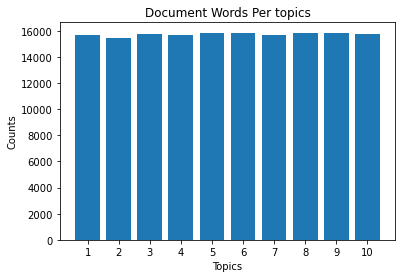

In [24]:
plot_words_per_topic(model)

###### Plotting words counts for each individual topic from one to ten

<Figure size 432x288 with 0 Axes>

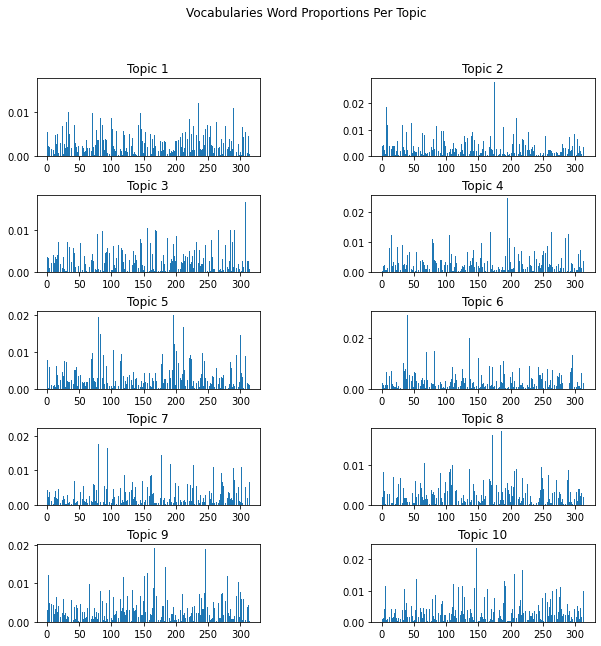

In [25]:
plot_word_dist(model)

### Plotting all vocabularies for all topics in the whole document

<Figure size 432x288 with 0 Axes>

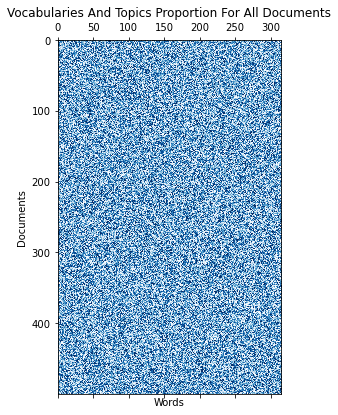

In [26]:
plot_data(model)

###### Print the percentage of each word in each topic

In [27]:
show_topics(model)

[array([[7.77411075e-04, 5.36955720e-03, 2.15497830e-03, 8.53735959e-04,
         2.12738176e-03, 2.71318596e-03, 3.85511965e-04, 1.62427705e-03,
         5.44526981e-04, 7.38507013e-03, 1.24400875e-03, 1.13094433e-03,
         3.47365483e-04, 4.85777000e-03, 2.53266629e-03, 2.78601984e-03,
         5.00279968e-03, 1.57968298e-03, 6.87014104e-04, 2.14926824e-05,
         1.23989568e-04, 2.97877488e-03, 8.76972889e-04, 7.21491347e-03,
         6.74328468e-03, 1.36544909e-03, 3.72757792e-04, 2.73723814e-03,
         5.57684236e-03, 1.85283302e-03, 7.86181184e-03, 1.51532721e-03,
         1.99637438e-03, 9.94814378e-03, 9.99181214e-04, 4.96021566e-03,
         3.02072136e-03, 1.10844013e-03, 1.90085918e-03, 1.38728531e-02,
         2.66034800e-03, 3.46427323e-05, 3.47282719e-03, 7.13511871e-03,
         2.94502441e-03, 4.22544236e-03, 2.08790122e-03, 9.69947397e-04,
         8.14921070e-03, 2.14716674e-03, 3.91097900e-03, 5.50817609e-05,
         6.59937062e-05, 4.38068188e-03, 1.03042919

### Can the topic model be used to define a topic based similarity measure between documents? 

######  We can use cosine formula in order to mesure the similarity between two documents

In [28]:
cosine_sim(model, data[67],data[49])    

0.7330889599913107

###### This model also used in order to measure the similarity between two files by cosine formula.

In [29]:
from nltk.corpus import stopwords  

X =pd.read_csv('file1.csv')
Y =pd.read_csv('file2.csv')

sw = stopwords.words('english') 
l1 =[];l2 =[]
  
# removing stop words from the string

X_set = {w for w in X if not w in sw} 
Y_set = {w for w in Y if not w in sw}
  
# form a set containing keywords of both strings 

rvector = X_set.union(Y_set) 
for w in rvector:
    if w in X_set: l1.append(1) # create a vector
    else: l1.append(0)
    if w in Y_set: l2.append(1)
    else: l2.append(0)
c = 0
  
# cosine formula

for i in range(len(rvector)):
        c+= l1[i]*l2[i]
cosine = c / float((sum(l1)*sum(l2))**0.5)

print("The similarity between the two files is: ", cosine)

The similarity between the two files is:  0.6666666666666666


### What about a new document? How can topics be assigned to it?

In the next three cells, I explained how the model is saved and then
be able to run on different databases. I applied it to another csv file. 

###### Saving the model to a file, lda.pkl is the file name

In [30]:
import pickle
with open('lda.pkl', 'wb') as fid:
    pickle.dump(LDA, fid)

###### Loading the model to use it on another dataset

In [31]:
with open('lda.pkl', 'rb') as fid:
    model_loaded = pickle.load(fid)

###### Apply the model on a new data set

In [32]:
data1 = pd.read_csv('Book1.csv')

<Figure size 432x288 with 0 Axes>

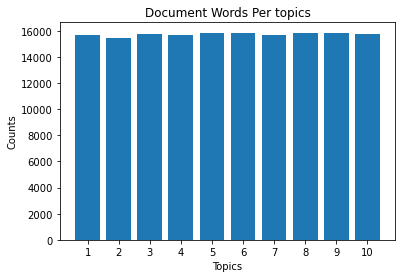

In [33]:
plot_words_per_topic(data1)

<Figure size 432x288 with 0 Axes>

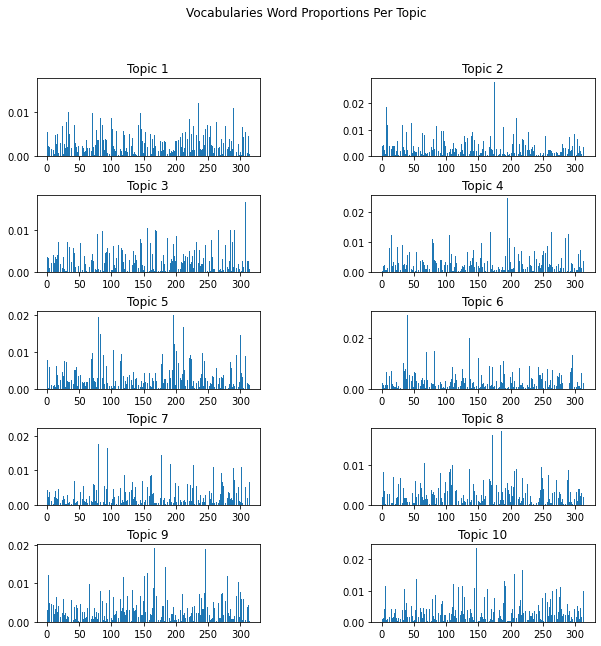

In [34]:
plot_word_dist(data1)

<Figure size 432x288 with 0 Axes>

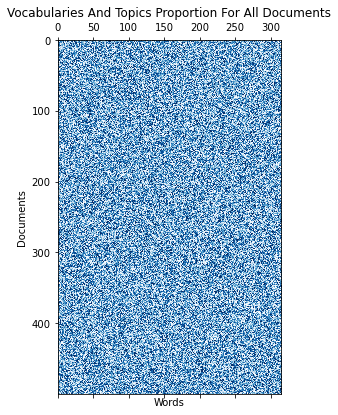

In [35]:
plot_data(data1)

In [36]:
show_topics(data1)

[array([[7.77411075e-04, 5.36955720e-03, 2.15497830e-03, 8.53735959e-04,
         2.12738176e-03, 2.71318596e-03, 3.85511965e-04, 1.62427705e-03,
         5.44526981e-04, 7.38507013e-03, 1.24400875e-03, 1.13094433e-03,
         3.47365483e-04, 4.85777000e-03, 2.53266629e-03, 2.78601984e-03,
         5.00279968e-03, 1.57968298e-03, 6.87014104e-04, 2.14926824e-05,
         1.23989568e-04, 2.97877488e-03, 8.76972889e-04, 7.21491347e-03,
         6.74328468e-03, 1.36544909e-03, 3.72757792e-04, 2.73723814e-03,
         5.57684236e-03, 1.85283302e-03, 7.86181184e-03, 1.51532721e-03,
         1.99637438e-03, 9.94814378e-03, 9.99181214e-04, 4.96021566e-03,
         3.02072136e-03, 1.10844013e-03, 1.90085918e-03, 1.38728531e-02,
         2.66034800e-03, 3.46427323e-05, 3.47282719e-03, 7.13511871e-03,
         2.94502441e-03, 4.22544236e-03, 2.08790122e-03, 9.69947397e-04,
         8.14921070e-03, 2.14716674e-03, 3.91097900e-03, 5.50817609e-05,
         6.59937062e-05, 4.38068188e-03, 1.03042919